<a href="https://colab.research.google.com/github/Paulo-vitorCS/DeepLearning/blob/main/Projeto_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto 02: Classificação binária Breast Cancer com validadação cruzada e dropout


###Etapa 01: Importação das bibliotecas

In [ ]:
!pip install skorch==0.8.0

In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn 
from skorch import NeuralNetBinaryClassifier  # Classificador para problemas binários
import torch
import seaborn as sns
from sklearn.model_selection import cross_val_score  # Bib para Validação cruzada 

###Etapa 02: Base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


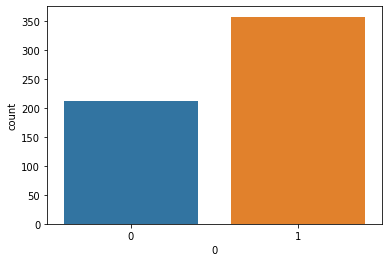

In [ ]:
sns.countplot(classe['0']);

In [ ]:
classe.shape

(569, 1)

In [ ]:
# sklearn exige o formato numpy array, não tensores
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)  # Retira o 1 de (569, 1)

In [ ]:
classe.shape

(569,)

In [ ]:
type(previsores)

numpy.ndarray

In [ ]:
type(classe)

numpy.ndarray

###Etapa 03: Classe para estrutura da rede neural

In [ ]:
# Usar a biblioteca skorch
class classificador_torch(nn.Module):
    def __init__(self):  # Construtor da classe
        super().__init__()  # Fazendo a inicialização

        # 30 -> 16 -> 16 -> 1
        self.dense0  = nn.Linear(30, 16)# Primeira camada densa
        torch.nn.init.uniform_(self.dense0.weight)  # Acessando a camada e Inicializando com pesos uniformes
        self.activation0 = nn.ReLU()
        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        self.dense2 = nn.Linear(16, 1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.output = nn.Sigmoid()

    def forward(self, X):
        X = self.dense0(X)  # "Alimentando" a primeira camada com os atributos (30)
        X = self.activation0(X)  # Ligando o resultado na função de ativação
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X

###Etapa 04: Skorch

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)  # O false é para fazer a validação cruzada posteriormente

###Etapa 05: Validação Cruzada

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.1008
      2       37.1094  0.0733
      3       37.1094  0.0684
      4       37.1094  0.0775
      5       37.1094  0.0685
      6       37.1094  0.0849
      7       37.1094  0.0669
      8       37.1094  0.0701
      9       37.1094  0.0766
     10       37.1094  0.0701
     11       37.1094  0.0677
     12       37.1094  0.0694
     13       37.1094  0.0764
     14       37.1094  0.0891
     15       37.1094  0.0710
     16       37.1094  0.0713
     17       37.1094  0.0703
     18       37.1094  0.0735
     19       37.1094  0.0689
     20       37.1094  0.0755
     21       37.1094  0.0821
     22       37.1094  0.0707
     23       37.1094  0.0835
     24       37.1094  0.0713
     25       13.5893  0.0796
     26        0.5466  0.0736
     27        0.5314  0.0721
     28        0.4981  0.0791
     29        0.4820  0.0695
     30        0.4769  0.0740
     31        0.4528  0.0719
     32   

In [ ]:
resultados.shape

(10,)

In [ ]:
resultados

array([0.84210526, 0.61403509, 0.89473684, 0.63157895, 0.85964912,
       0.89473684, 0.87719298, 0.92982456, 0.63157895, 0.625     ])

In [ ]:
media = resultados.mean()
media

0.7800438596491228

In [ ]:
desvio_padrao = resultados.std()
desvio_padrao

0.12808237895474653

###Etapa 06: Dropout (Técnica para evitar overfitting

In [ ]:
class classificador_torch(nn.Module):
    def __init__(self):  # Construtor da classe
        super().__init__()  # Fazendo a inicialização

        # 30 -> 16 -> 16 -> 1
        self.dense0  = nn.Linear(30, 16)# Primeira camada densa
        torch.nn.init.uniform_(self.dense0.weight)  # Acessando a camada e Inicializando com pesos uniformes
        self.activation0 = nn.ReLU()
        # Aplicação do dropout:
        self.dropout0 = nn.Dropout(0.2)  # Zerando 20% dos neurônios
        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        # Aplicação do dropout:
        self.dropout1 = nn.Dropout(0.2)  # Zerando 20% dos neurônios
        self.dense2 = nn.Linear(16, 1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.output = nn.Sigmoid()

    def forward(self, X):
        X = self.dense0(X)  # "Alimentando" a primeira camada com os atributos (30)
        X = self.activation0(X)  # Ligando o resultado na função de ativação
        X = self.dropout0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dropout1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)  # O false é para fazer a validação cruzada posteriormente

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0883
      2       37.1094  0.0811
      3       37.1094  0.0772
      4       37.1094  0.0838
      5       37.1094  0.0793
      6       37.1094  0.0787
      7       37.1094  0.0762
      8       37.1094  0.0765
      9       37.1094  0.0795
     10       37.1094  0.0821
     11       37.1094  0.0836
     12       37.1094  0.0862
     13       37.1094  0.0769
     14       37.1094  0.0872
     15       37.1094  0.0783
     16       37.1094  0.0842
     17       37.1094  0.0739
     18       37.1094  0.0780
     19       37.1094  0.0779
     20       37.1094  0.0789
     21       37.1094  0.0827
     22       37.1094  0.0798
     23       37.1094  0.0960
     24       37.1094  0.0845
     25       37.1094  0.0922
     26       13.8364  0.0815
     27        0.5871  0.0832
     28        0.5416  0.0783
     29        0.5084  0.0801
     30        0.5211  0.0768
     31        0.4759  0.0768
     32   

In [ ]:
media = resultados.mean()
desvio_padrao = resultados.std()
media, desvio_padrao

(0.8348684210526315, 0.09827913940834013)